In [2]:
import pandas as pd 
import numpy as np 
import json 

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import datetime as dt 

import plotly.express as px
import plotly.graph_objects as go 
import plotly.io as pio

import warnings 
warnings.filterwarnings('ignore')

import requests
import glob
import xlrd

###Reading the file 

In [3]:
df1=pd.read_csv(r"D://DATA SET//singapore resale//1990-1999.csv")
df2=pd.read_csv(r"D:\DATA SET\singapore resale//2000-2012.csv")  
df3=pd.read_csv(r"D:\DATA SET\singapore resale//2012-2014.csv")
df4=pd.read_csv(r"D:\DATA SET\singapore resale//2015-2016.csv") 
df5=pd.read_csv( r"D:\DATA SET\singapore resale//2017-current.csv")

df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
922306,2024-04,YISHUN,4 ROOM,165,YISHUN RING RD,07 TO 09,103.0,Model A,1988,499000.0,63 years 04 months
922307,2024-04,YISHUN,4 ROOM,629,YISHUN ST 61,04 TO 06,103.0,Model A,1988,538000.0,63 years 02 months
922308,2024-04,YISHUN,4 ROOM,634,YISHUN ST 61,01 TO 03,104.0,Model A,1987,505000.0,62 years 08 months
922309,2024-04,YISHUN,4 ROOM,879,YISHUN ST 81,10 TO 12,84.0,Simplified,1987,500000.0,62 years 07 months


In [4]:
df.shape

(922311, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922311 entries, 0 to 922310
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                922311 non-null  object 
 1   town                 922311 non-null  object 
 2   flat_type            922311 non-null  object 
 3   block                922311 non-null  object 
 4   street_name          922311 non-null  object 
 5   storey_range         922311 non-null  object 
 6   floor_area_sqm       922311 non-null  float64
 7   flat_model           922311 non-null  object 
 8   lease_commence_date  922311 non-null  int64  
 9   resale_price         922311 non-null  float64
 10  remaining_lease      213261 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.4+ MB


In [8]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [9]:
df.describe().T  #quick overview of the data 

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,922311.0,95.693911,25.834455,28.0,73.0,93.0,113.0,307.0
lease_commence_date,922311.0,1988.224585,10.609981,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,922311.0,319292.700936,169161.464211,5000.0,193000.0,295000.0,415000.0,1568888.0


In [10]:
df['resale_price'].value_counts()   #returns the count of all unique values in the given index in descending order, without any null values

resale_price
300000.0    6911
350000.0    6816
280000.0    6544
320000.0    6515
250000.0    6283
            ... 
173999.0       1
225610.0       1
242250.0       1
102080.0       1
629500.0       1
Name: count, Length: 9440, dtype: int64

###DATA CLEANING

In [11]:
df.nunique()

month                   412
town                     27
flat_type                 8
block                  2706
street_name             584
storey_range             25
floor_area_sqm          211
flat_model               34
lease_commence_date      56
resale_price           9440
remaining_lease         724
dtype: int64

In [12]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [13]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row,str):
        if 'years' in row:
            parts=row.split()
            years=float(parts[0])
            months=float(parts[2]) if len(parts) > 2 else 0
            return years + months/ 12
        
    return row

In [14]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [15]:
# fill null values in remaining_lease with mode because null values more than 25% it will affect accuracy 

df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
922306,2024-04,YISHUN,4 ROOM,165,YISHUN RING RD,07 TO 09,103.0,Model A,1988,499000.0,63.333333
922307,2024-04,YISHUN,4 ROOM,629,YISHUN ST 61,04 TO 06,103.0,Model A,1988,538000.0,63.166667
922308,2024-04,YISHUN,4 ROOM,634,YISHUN ST 61,01 TO 03,104.0,Model A,1987,505000.0,62.666667
922309,2024-04,YISHUN,4 ROOM,879,YISHUN ST 81,10 TO 12,84.0,Simplified,1987,500000.0,62.583333
922310,2024-04,YISHUN,5 ROOM,432A,YISHUN AVE 1,07 TO 09,112.0,Improved,2015,660000.0,90.583333


In [16]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711640
95.000000      2360
67.000000      2209
69.000000      1911
71.000000      1754
              ...  
97.250000         1
97.583333         1
97.750000         1
41.750000         1
41.833333         1
Name: count, Length: 671, dtype: int64

In [17]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

###DATATYPE CONVERSION

In [18]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [19]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.000000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.000000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,68.000000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,68.000000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,68.000000
...,...,...,...,...,...,...,...,...,...,...,...
922306,2024-04,YISHUN,4 ROOM,165,YISHUN RING RD,07 TO 09,103.0,Model A,1988,499000.0,63.333333
922307,2024-04,YISHUN,4 ROOM,629,YISHUN ST 61,04 TO 06,103.0,Model A,1988,538000.0,63.166667
922308,2024-04,YISHUN,4 ROOM,634,YISHUN ST 61,01 TO 03,104.0,Model A,1987,505000.0,62.666667
922309,2024-04,YISHUN,4 ROOM,879,YISHUN ST 81,10 TO 12,84.0,Simplified,1987,500000.0,62.583333


In [20]:
#month column
#seperate the year and month of resale because this is time series data

df[['resale_year','resale_month']]=df['month'].str.split('-',expand=True)

#drop the resale month column 
df.drop('month',axis=1,inplace=True)

df.head(2)


,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [21]:
#split the 'Range' column into upper_bound and lower_bound

df[['storey_lower_bound','storey_upper_bound']]=df['storey_range'].str.split("TO",expand=True)

df['storey_lower_bound']=pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound']=pd.to_numeric(df['storey_upper_bound'])
df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
922309,YISHUN,4 ROOM,879,YISHUN ST 81,10 TO 12,84.0,Simplified,1987,500000.0,62.583333,2024,04,10,12
922310,YISHUN,5 ROOM,432A,YISHUN AVE 1,07 TO 09,112.0,Improved,2015,660000.0,90.583333,2024,04,7,9


In [22]:
df.drop('storey_range',axis=1,inplace=True)

In [23]:
#CONVERTING

df["block"]=pd.to_numeric(df['block'],errors='coerce')
df["resale_year"]=pd.to_numeric(df['resale_year'],errors='coerce')
df["resale_month"]=pd.to_numeric(df['resale_month'],errors='coerce')
df["block"]=df["block"].fillna(df['block'].mode()[0])

In [24]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [25]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

###TEXT ERRORS

In [26]:
object_data_cols=[var for var in df.columns if df[var].dtype=='object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [27]:
df['town'].value_counts()

town
TAMPINES           79619
YISHUN             69754
BEDOK              66403
JURONG WEST        66364
WOODLANDS          65179
ANG MO KIO         51905
HOUGANG            50488
BUKIT BATOK        44099
CHOA CHU KANG      38079
BUKIT MERAH        34182
PASIR RIS          33107
SENGKANG           32135
TOA PAYOH          31409
QUEENSTOWN         28653
GEYLANG            28071
CLEMENTI           27944
BUKIT PANJANG      27552
KALLANG/WHAMPOA    27023
JURONG EAST        24674
SERANGOON          22744
BISHAN             21202
PUNGGOL            20326
SEMBAWANG          13695
MARINE PARADE       8012
CENTRAL AREA        7120
BUKIT TIMAH         2508
LIM CHU KANG          64
Name: count, dtype: int64

In [28]:
df['flat_type'].value_counts()

flat_type
4 ROOM              350282
3 ROOM              294766
5 ROOM              194356
EXECUTIVE            69365
2 ROOM               11698
1 ROOM                1301
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [29]:
#Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid dublicte
df['flat_type'].value_counts()

flat_type
4 ROOM              350282
3 ROOM              294766
5 ROOM              194356
EXECUTIVE            69365
2 ROOM               11698
1 ROOM                1301
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [30]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17547
BEDOK RESERVOIR RD    14684
ANG MO KIO AVE 10     13771
ANG MO KIO AVE 3      12118
HOUGANG AVE 8          9331
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [31]:
df['flat_model'].value_counts()

flat_model
Model A                   192816
Improved                  167099
New Generation            109540
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46310
Simplified                 34109
Apartment                  25422
Standard                   25049
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17336
MAISONETTE                 12215
Model A2                   10088
APARTMENT                   9901
DBSS                        3254
Adjoined flat               1243
Model A-Maisonette          1087
MODEL A-MAISONETTE           982
Terrace                      444
Type S1                      434
MULTI GENERATION             279
Multi Generation             264
TERRACE                      247
Type S2                      215
Premium Apartment Loft       107
2-room                       103
Premium Maisonette            86
Improved-Maisonette           81

In [32]:
df['flat_model']=df['flat_model'].replace({'MODEL A':'model A','NEW GENERATION':'New Generation',
                                           'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                           'MULTI GENERATION':'Multi Generation','2-ROOM':'2-room',
                                           'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                           'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                           'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                           'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})
                                           

In [33]:
df['flat_model'].value_counts()

flat_model
Improved                  240688
Model A                   192816
New Generation            188438
model A                    70381
Simplified                 57367
Premium Apartment          46316
Standard                   42424
Apartment                  35323
Maisonette                 29551
Model A2                   10088
DBSS                        3254
Model A-Maisonette          2069
Adjoined flat               1243
Terrace                      691
Multi Generation             543
Type S1                      434
Type S2                      215
Improved-Maisonette          125
2-room                       124
Premium Apartment Loft       107
Premium Maisonette            86
3Gen                          28
Name: count, dtype: int64

###DUPLICATES

In [34]:
df.duplicated().sum()

2334

In [35]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

###outliers

In [36]:
float_data_cols=[var for var in df.columns if df[var].dtype=='float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [37]:
integer_data_cols=[var for var in df.columns if df[var].dtype=='int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

###using boxplot

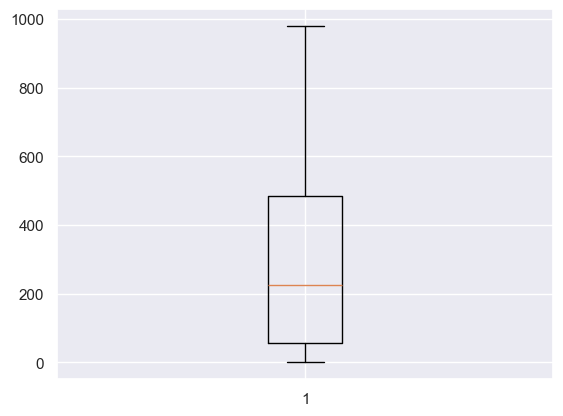

In [38]:
#creating plot 
plt.boxplot(df['block'])

#show plot
plt.show()

In [39]:
#IQR
Q1=df['block'].quantile(0.25)
Q3=df['block'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound


(-583.5, 1124.5)

In [40]:
df.block=df.block.clip(lower_bound,upper_bound)

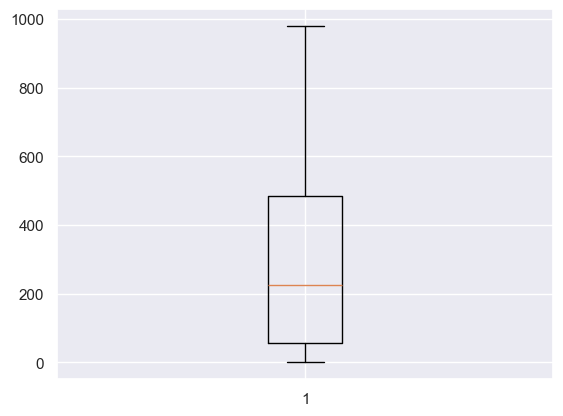

In [41]:
#creating plot
plt.boxplot(df['block'])

#show plot
plt.show()

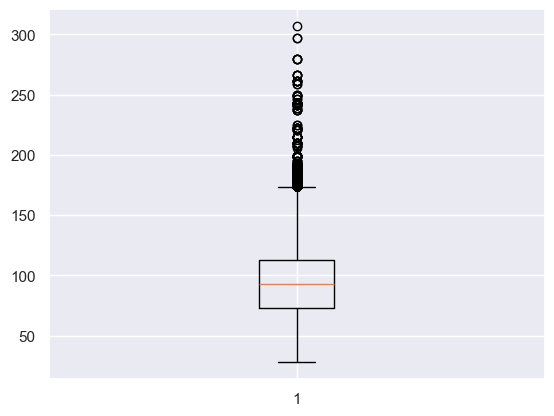

In [42]:
#creating plot 
plt.boxplot(df['floor_area_sqm'])

#show plot
plt.show()

In [43]:
Q1=df['floor_area_sqm'].quantile(0.25)
Q2=df['floor_area_sqm'].quantile(0.75)

IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(-543.5, 1100.5)

In [44]:
df.floor_area_sqm=df.floor_area_sqm.clip(lower_bound,upper_bound)

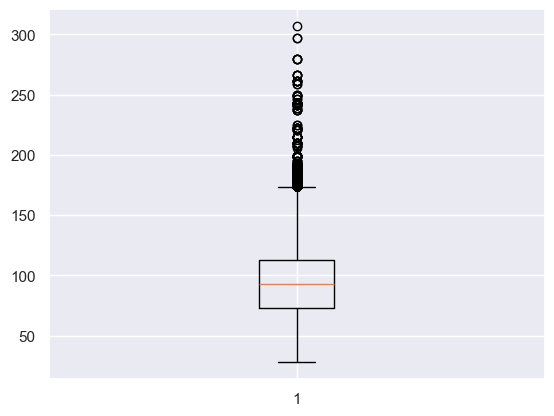

In [45]:
#creating plot

plt.boxplot(df['floor_area_sqm'])

#show plot
plt.show()

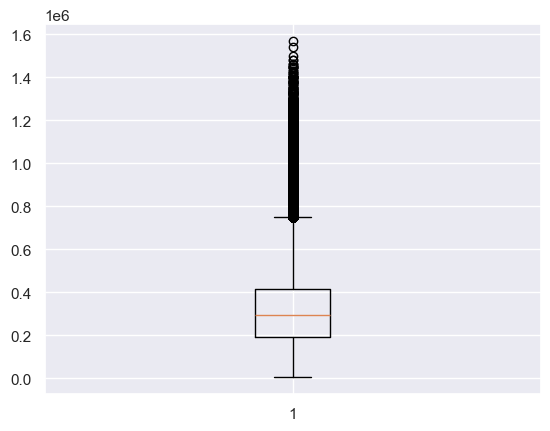

In [46]:
#creating plot
plt.boxplot(df['resale_price'])

#show plot
plt.show()

In [47]:
Q1=df['resale_price'].quantile(0.25)
Q3=df['resale_price'].quantile(0.75)

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(192383.5, 415616.5)

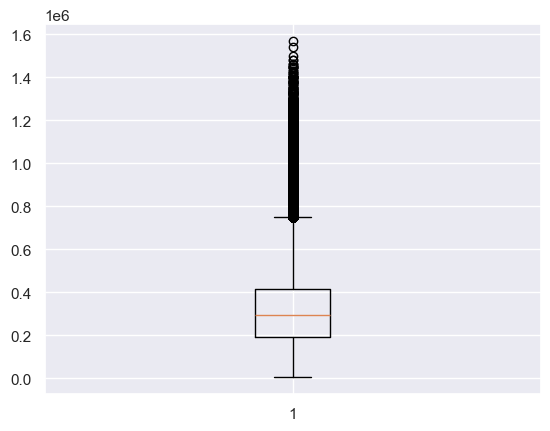

In [48]:
#creating plot
plt.boxplot(df['resale_price'])

#show plot
plt.show()

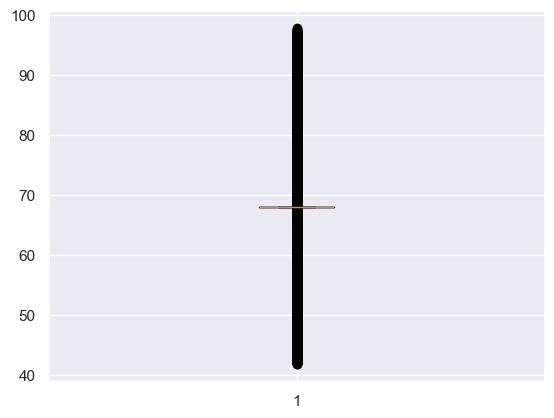

In [49]:
#craeting plot
plt.boxplot(df['remaining_lease'])

#show plot
plt.show()

In [50]:
Q1=df['remaining_lease'].quantile(0.25)
Q3=df['remaining_lease'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(68.0, 68.0)

In [51]:
df.remaining_lease=df.remaining_lease.clip(lower_bound,upper_bound)

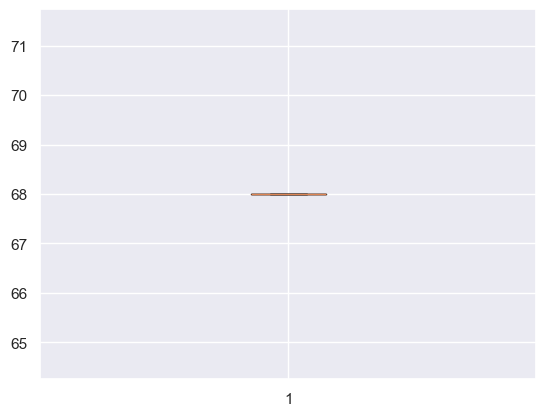

In [52]:
#creating plot
plt.boxplot(df['remaining_lease'])
#sow plot
plt.show()

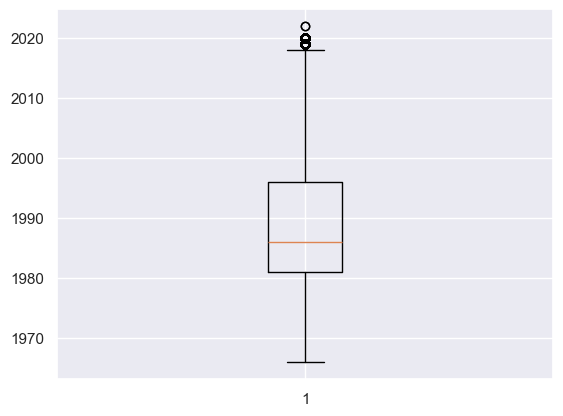

In [53]:
#creating plot
plt.boxplot(df['lease_commence_date'])

#show plot
plt.show()

In [54]:
Q1=df['lease_commence_date'].quantile(0.25)
Q3=df['lease_commence_date'].quantile(0.75)

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(1981.0, 1996.0)

In [55]:
df.lease_commence_date=df.lease_commence_date.clip(lower_bound,upper_bound)

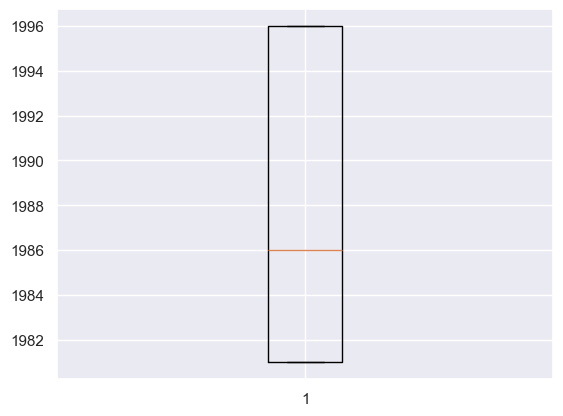

In [56]:
#creating plot
plt.boxplot(df['lease_commence_date'])

#show plot
plt.show()

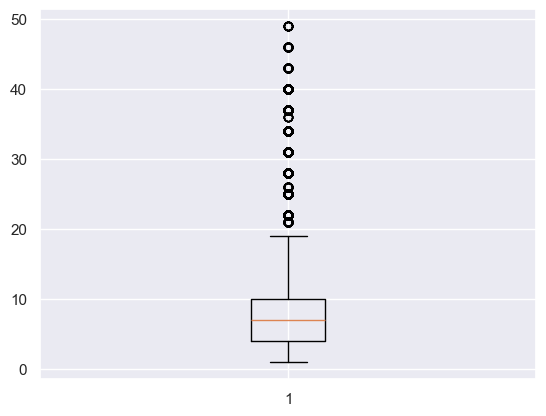

In [57]:
#creating plot
plt.boxplot(df['storey_lower_bound'])
plt.show()

In [58]:
Q1=df['storey_lower_bound'].quantile(0.25)
Q3=df['storey_lower_bound'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(-5.0, 19.0)

In [59]:
df.storey_lower_bound=df.storey_lower_bound.clip(lower_bound,upper_bound)

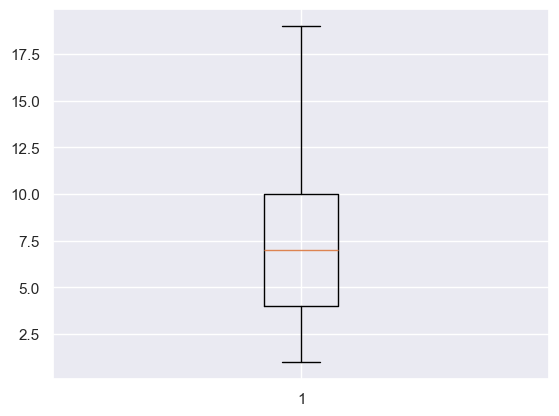

In [60]:
#creating plot
plt.boxplot(df['storey_lower_bound'])

#show plot
plt.show()

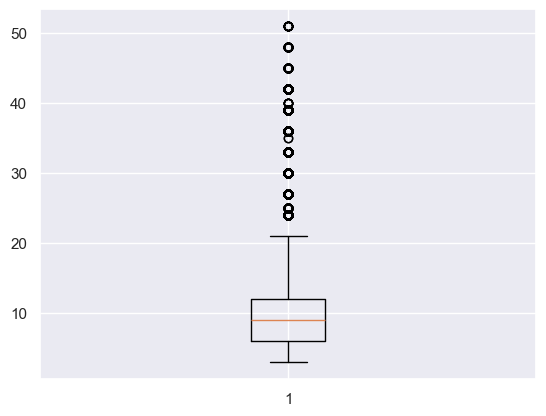

In [61]:
#creating plot
plt.boxplot(df['storey_upper_bound'])

#show plot
plt.show()

In [62]:
Q1=df['storey_lower_bound'].quantile(0.25)
Q2=df['storey_lower_bound'].quantile(0.75)

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(-5.0, 19.0)

In [63]:
df.storey_lower_bound=df.storey_lower_bound.clip(lower_bound,upper_bound)

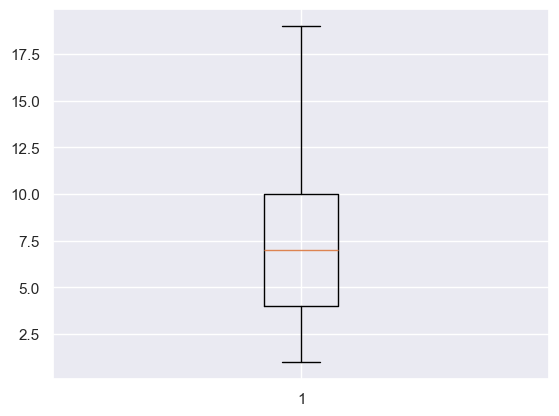

In [64]:
#creating plot
plt.boxplot(df['storey_lower_bound'])

#show plot
plt.show()


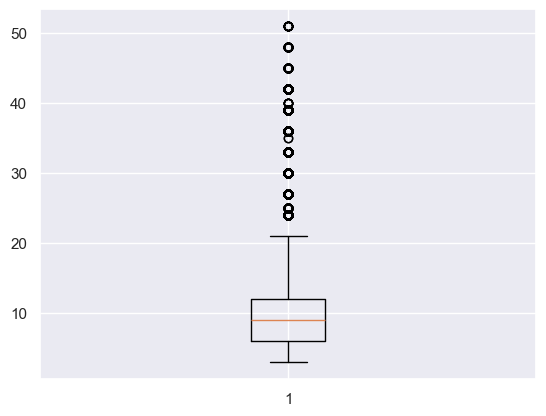

In [65]:
#creating plot
plt.boxplot(df['storey_upper_bound'])

#show plot
plt.show()

In [66]:
Q1=df['storey_upper_bound'].quantile(0.25)
Q3=df['storey_upper_bound'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(-3.0, 21.0)

In [67]:
df.storey_upper_bound=df.storey_upper_bound.clip(lower_bound,upper_bound)

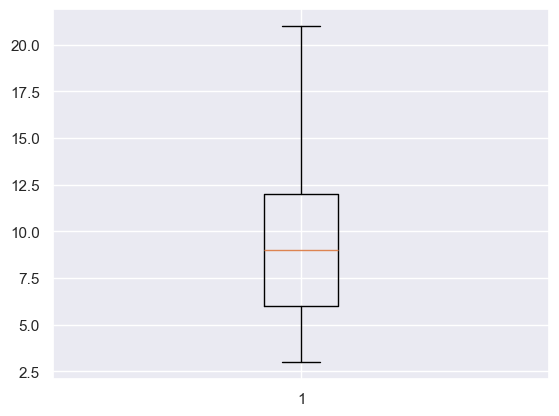

In [68]:
#creating plot
plt.boxplot(df['storey_upper_bound'])

#show plot
plt.show()

###EXPLORATRY DATA ANALYSIS

###catagorical vs Frequency using Bar plot

In [69]:
object_data_cols=[var for var in df.columns if df[var].dtype=='object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

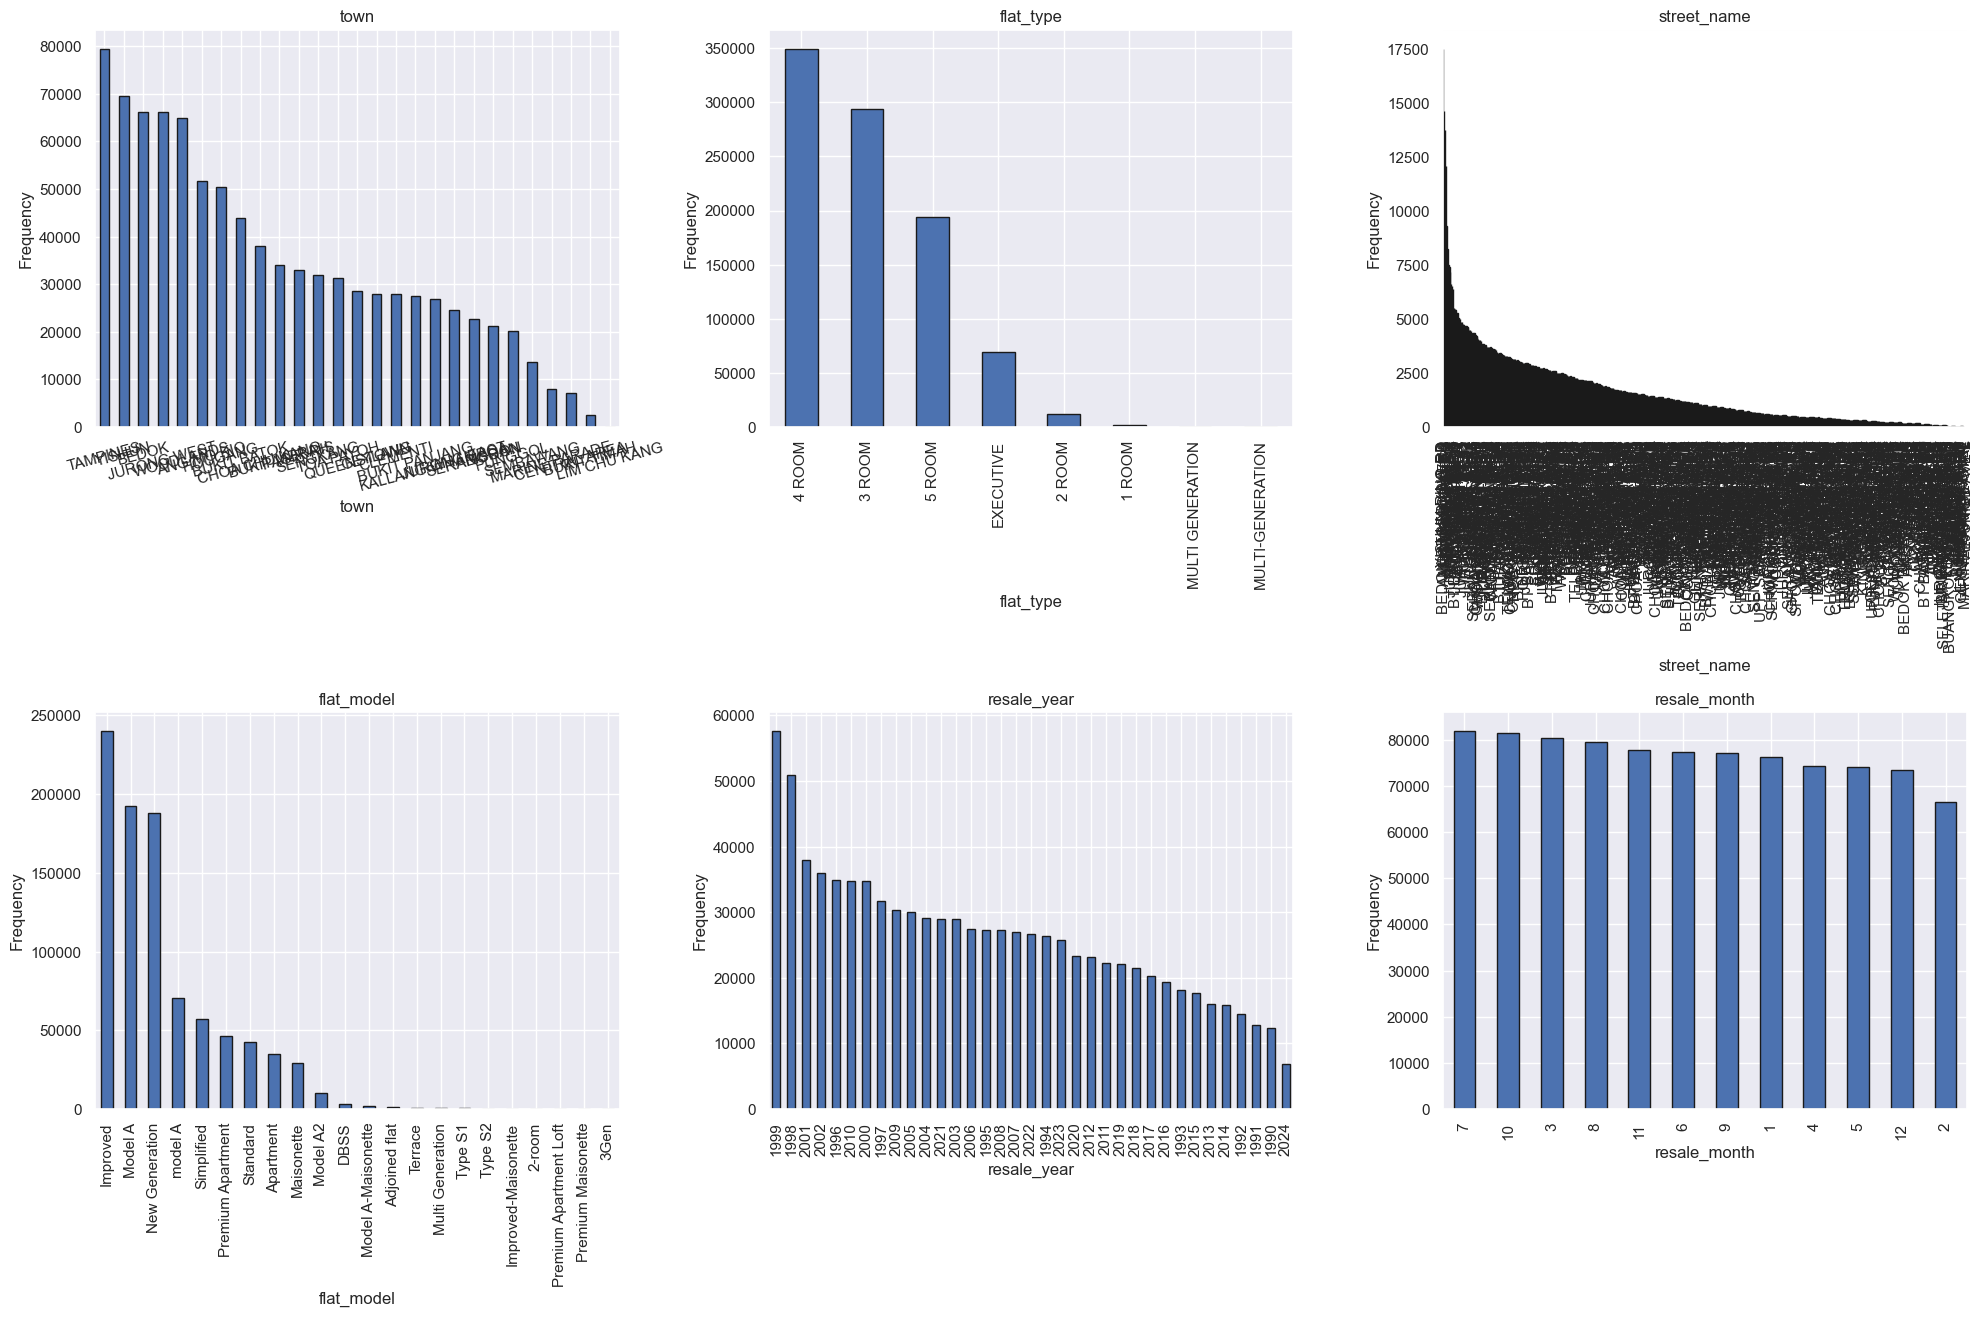

In [70]:
plt.figure(figsize=(20,25))

plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###FEATURES VS TARGET VARIABLE (categorical_data)

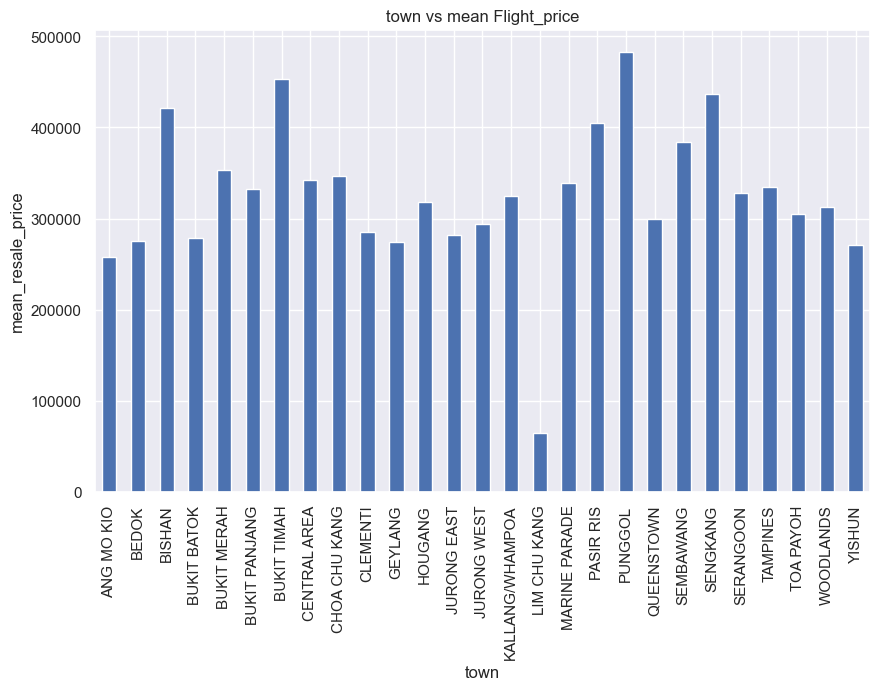

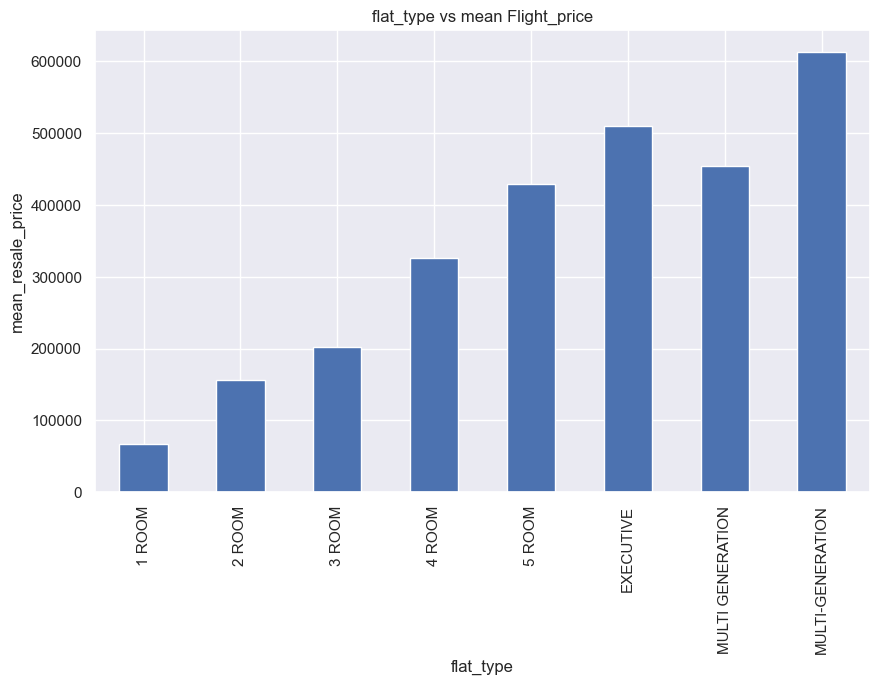

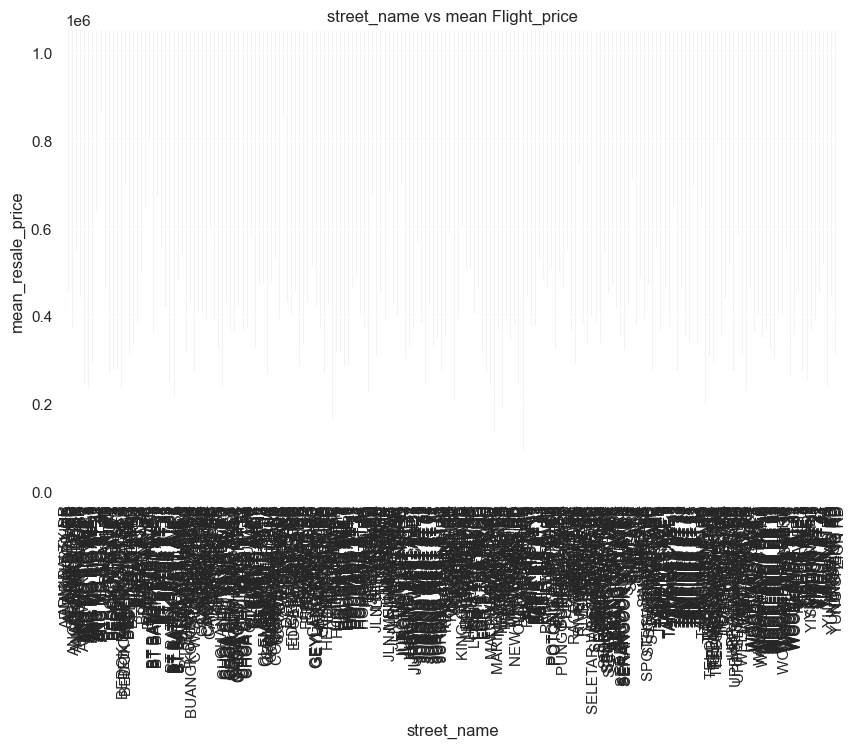

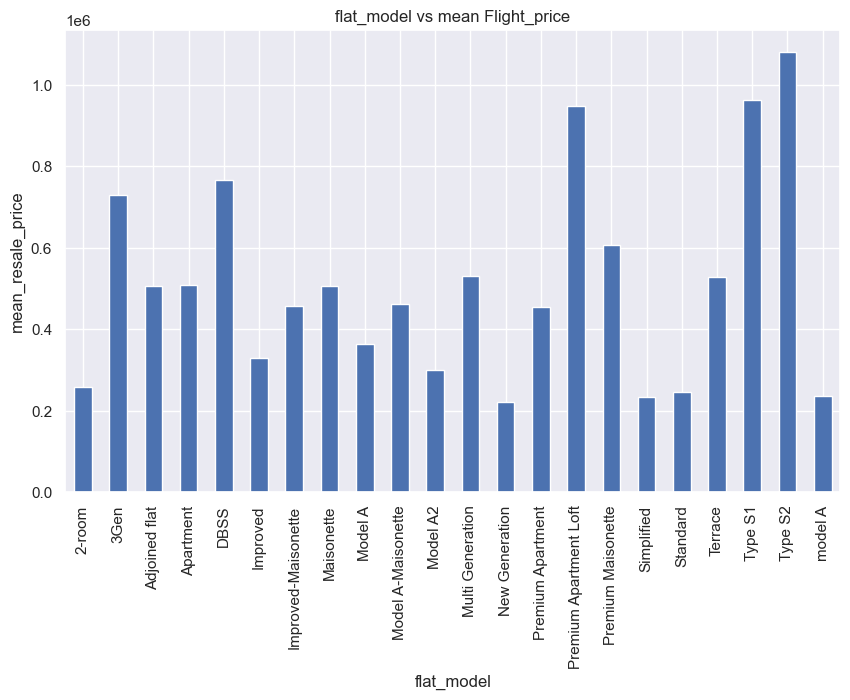

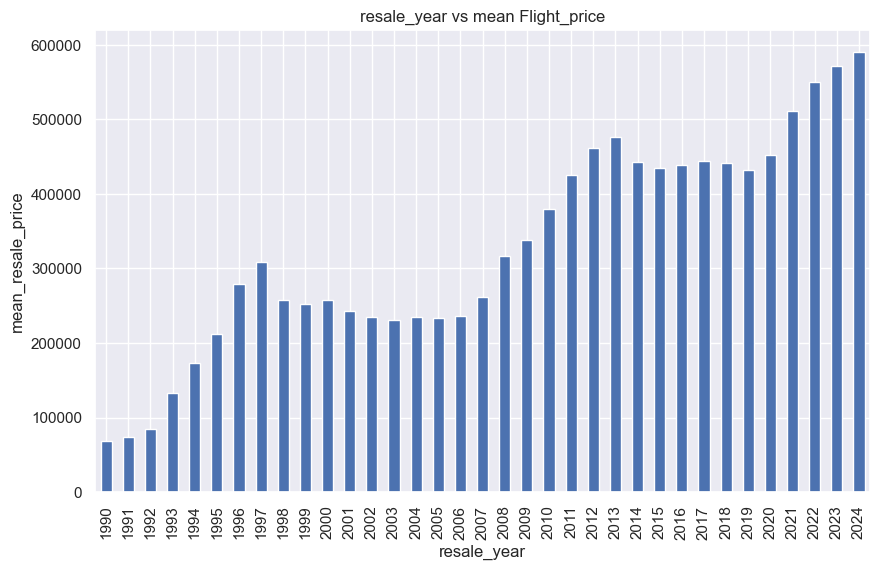

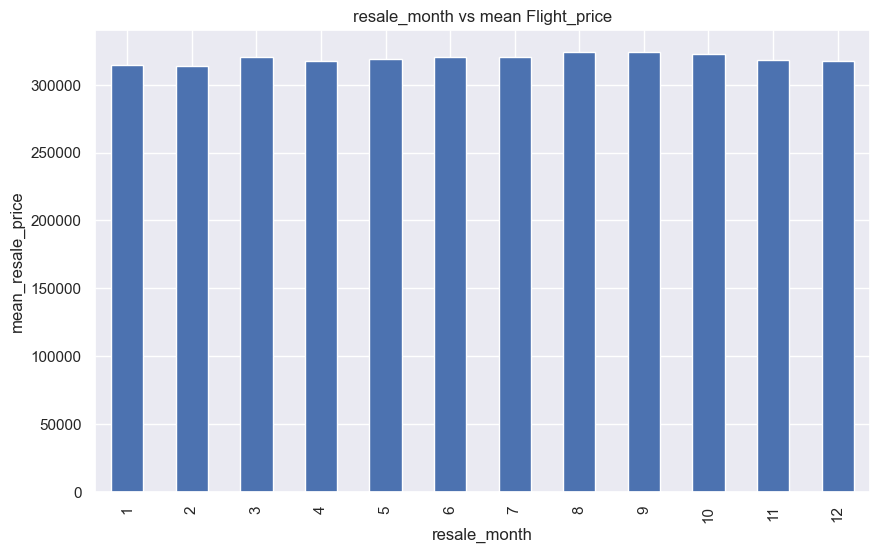

In [71]:
#List of features to plot
features=[
    'town',
    'flat_type',
    'street_name',
    'flat_model',
    'resale_year',
    'resale_month'
    
]

for feature in features:
    plt.figure(figsize=(10,6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('mean_resale_price')
    plt.title(f'{feature} vs mean Flight_price')
    plt.show()


###FEATURE VS TARGET(CONTINIOUS DATA)

In [72]:
float_data_cols=[var for var in df.columns if df[var].dtype=='float_64']
float_data_cols

[]

In [73]:
integer_data_cols=[var for var in df.columns if df[var].dtype =='int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

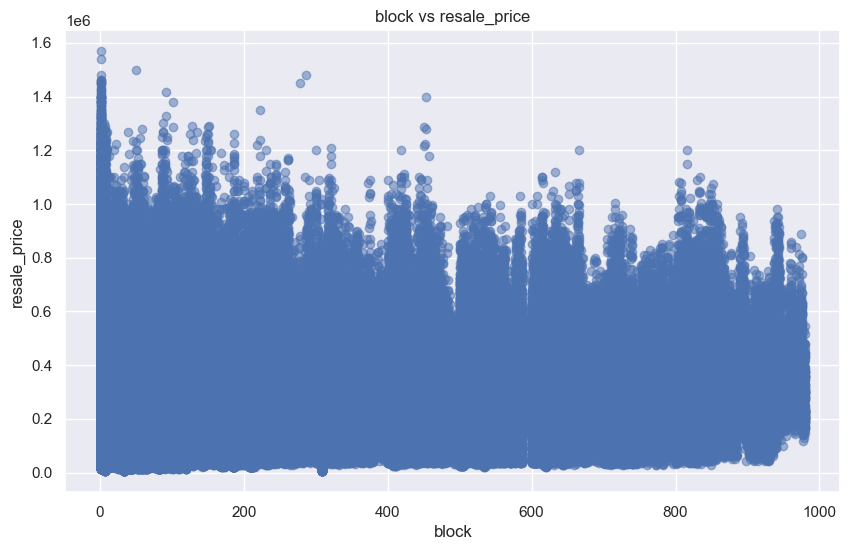

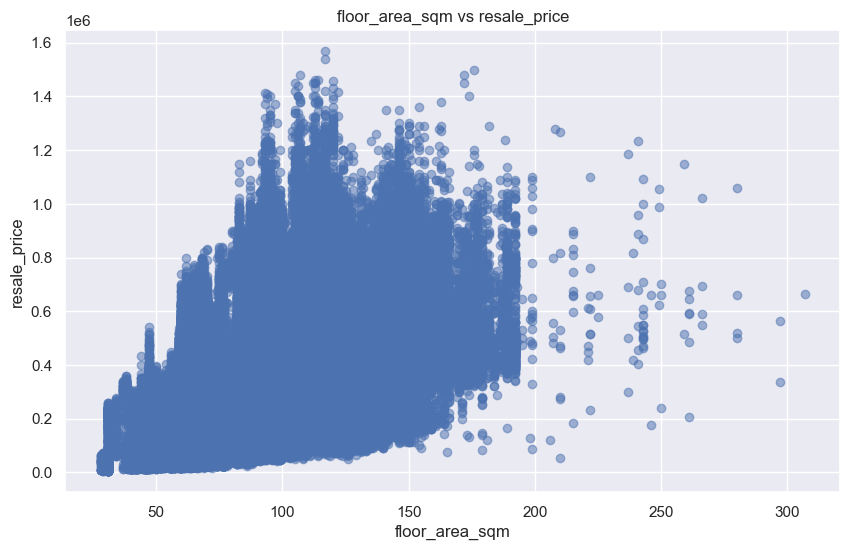

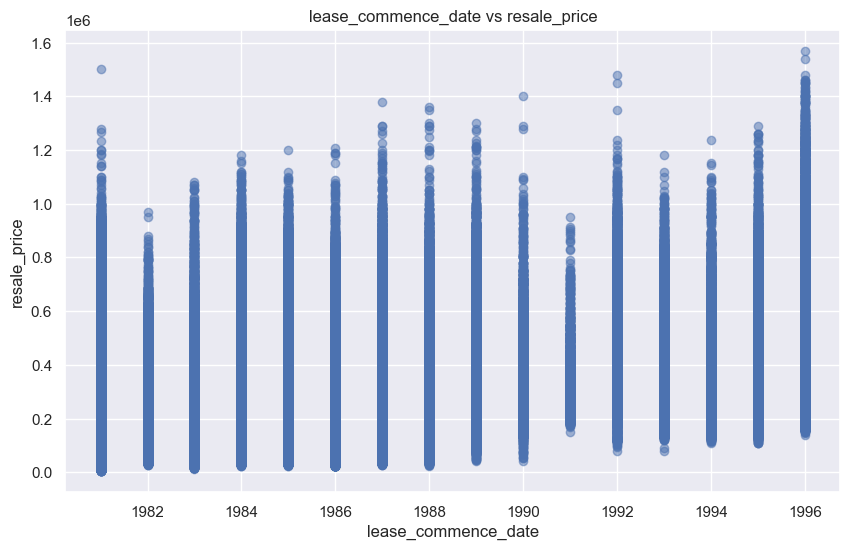

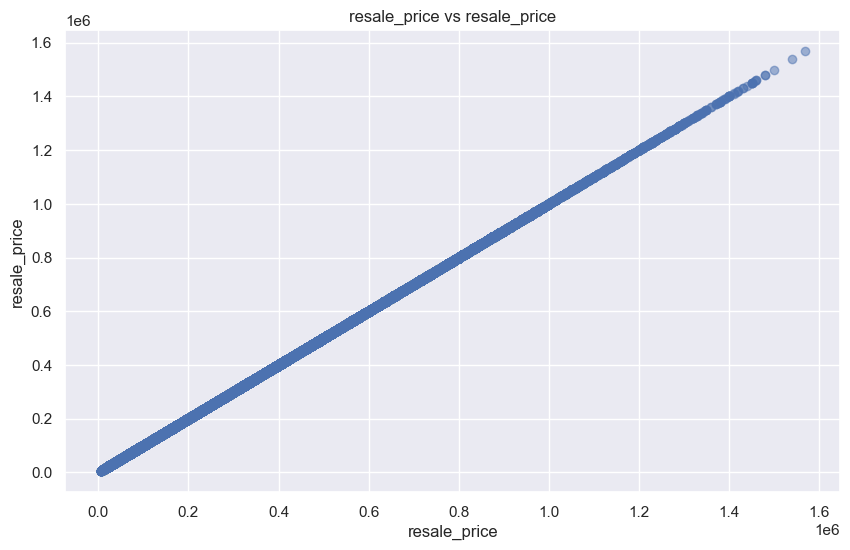

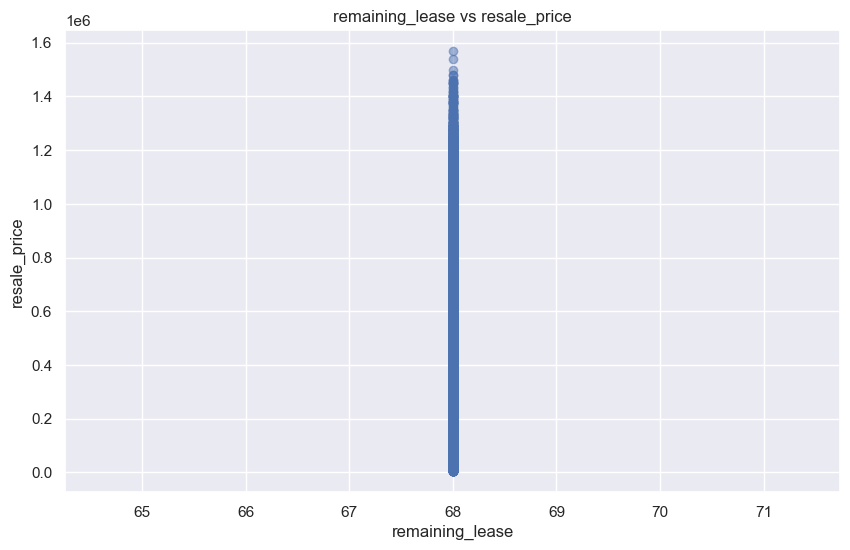

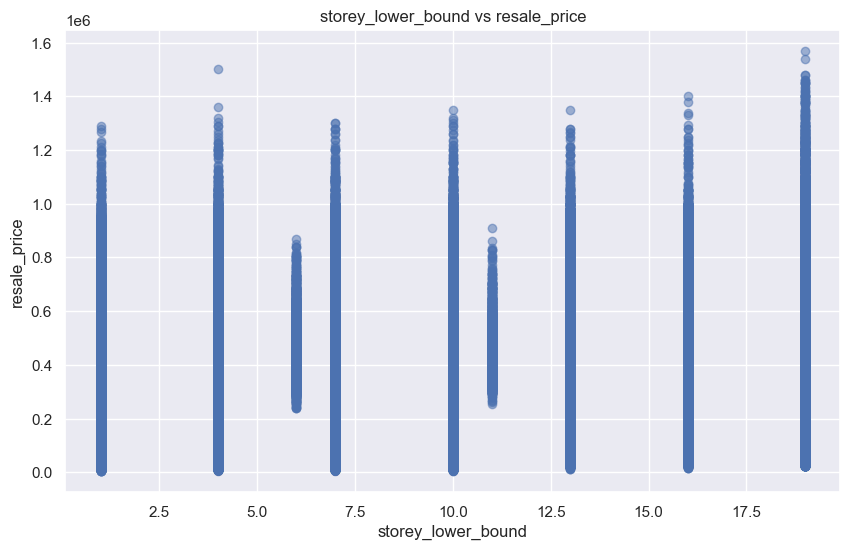

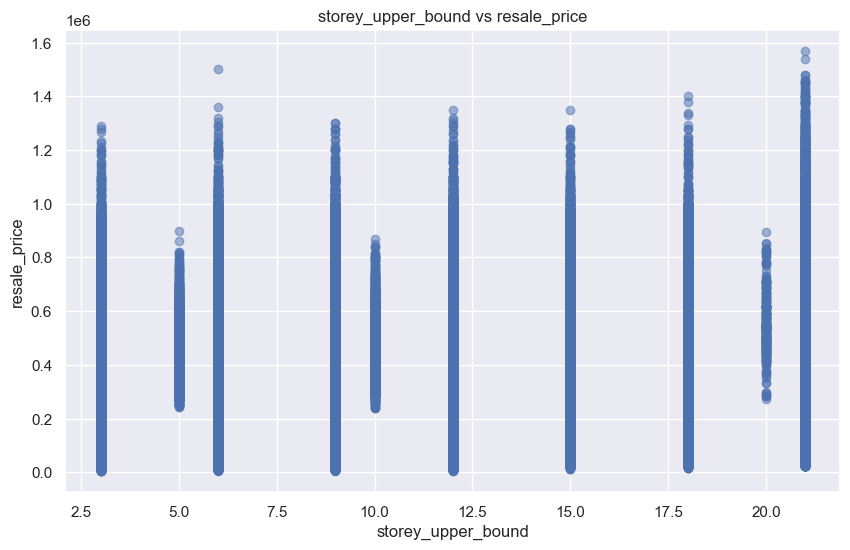

In [74]:
features=['block',
          'floor_area_sqm',
          'lease_commence_date',
          'resale_price',
          'remaining_lease',
          'storey_lower_bound',
          'storey_upper_bound']

target='resale_price'
for feature in features:
    plt.figure(figsize=(10,6))
    plt.scatter(df[feature],df[target],alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

###Encoding Categorical Variabels  

In [75]:
#using encoding make a copy
df1=df.copy()

object_data_cols=[var for var in df.columns if df[var].dtype=='object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [76]:
from sklearn.preprocessing  import LabelEncoder
#initialise the Encoder
le=LabelEncoder()


In [77]:
#list unique street names
streets=df1['street_name'].unique()
#map the streets to provide the input to the ML model 
streets_mapping ={street:idx+1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [78]:
#alter the column  with the mapped numbers 
df1['street_name']=df1['street_name'].map(streets_mapping)

#dispaly the dataframe 
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1981,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1981,6000.0,68.0,1990,1,4,6


In [79]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [80]:
category_mapping={
    '1 ROOM':1,
    '2 ROOM':2,
    '3 ROOM':3,
    '4.ROOM':4,
    '5.ROOM':5,
    'EXECUTIVE':6,
    'MULTI GENERATION':7
}

#alter the column with the mapped numbers 
df1['flat_type']=df1['flat_type'].map(category_mapping)

#display the dataframe
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1.0,309.0,1,31.0,Improved,1981,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1.0,309.0,1,31.0,Improved,1981,6000.0,68.0,1990,1,4,6


In [81]:
# creating a mapping of 'flat_model' values to numbers 
flat_model_mapping={
    'IMPROVED':1,
    'NEW GENERATION':2,
    'MODEL A':3,
    'STANDARD':4,
    'SIMPLIFIED':5,
    'MODEL A-MAISONETTE':6,
    'APARTMENT':7,
    'MAISONETTE':8,
    'TERRACE':9,
    '2-ROOM':10,
    'IMPROVED-MAISONETTE':11,
    'MULTI GENERATION':12,
    'PREMIUM APARTMENT':13,
    'Improved':14,
    'New Generation':15,
    'Model A':16,
    'Standard':17,
    'Apartment':18,
    'Simplified':19,
    'Model A-Maisonette':20,
    'Maisonette':21,
    'Multi Generation':22,
    'Adjoineed flat':23,
    'Premium Apartment':24,
    'Terrace':25,
    'Improved Maisonette':26,
     'Premium Maisonette':27,
     '2-room':28,
     'Model A2':29,
     'DBSS':30,
     'Type S1':31,
     'Type S2':32,
     'Premium Apartment Loft':33,
     '3Gen':34


}

#map ''flat_model' values to numbers 

df1['flat_model']=df1['flat_model'].map(flat_model_mapping)

#Display the Dataframe
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1.0,309.0,1,31.0,14.0,1981,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1.0,309.0,1,31.0,14.0,1981,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1.0,309.0,1,31.0,14.0,1981,8000.0,68.0,1990,1,10,12


In [82]:
#create a mapping of  'town' values to numbers 
town_mapping={
    'ANG MO KIO':1,
    'BEDOK':2,
    'BISHAN':3,
    'BHUKIT BATOK':4,
    'BHUKIT MERAH':5,
     'BHUKIT TIMAH':6,
     'CENTRAL AREA':7,
     'CHOA CHU KANG':8,
     'CLEMENTI':9,
     'GEYLANG':10,
     'HOUGANG':11,
     'JURONG EAST':12,
     'JURONG WEST':13,
     'KALLANG/WHAMPOA':14,
     'MARINE PARADE':15,
     'QUEENSTOWN':16,
     'SENGKANG':17,
     'SERANGOON':18,
     'TAMPINES':19,
      'TOA PAYOH':20,
      'WOODLANDS':21,
      'YISHUN':22,
      'LIM CHU KANG':23,
      'SEMBAWANG':24,
      'BUKIT PANJANG':25,
      'PASIR RIS':26,
      'PUNGGOL':27

    
}

#Map 'town' values to numbers 
df1['town']=df1['town'].map(town_mapping)

#Display the dataframe 
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1.0,1.0,309.0,1,31.0,14.0,1981,9000.0,68.0,1990,1,10,12
1,1.0,1.0,309.0,1,31.0,14.0,1981,6000.0,68.0,1990,1,4,6
2,1.0,1.0,309.0,1,31.0,14.0,1981,8000.0,68.0,1990,1,10,12
3,1.0,1.0,309.0,1,31.0,14.0,1981,6000.0,68.0,1990,1,7,9


In [83]:
#save the processed data for the deployment 
df1.to_csv('final.csv')

###correlation 

In [84]:
#correlation matrix (ranges from 1 to -1)
corrm=df1.corr()

#corrm.to_csv('corrm_csv')
corrm 

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.240403,-0.001507,0.588391,0.194460,0.171094,0.405094,0.125587,NaN,0.129321,0.003611,-0.012947,-0.012638
flat_type,0.240403,1.000000,0.214553,0.463670,0.971841,0.709623,0.639046,0.718378,NaN,0.071752,0.003520,-0.000974,-0.000565
block,-0.001507,0.214553,1.000000,0.049143,0.187549,0.002382,0.087565,-0.086079,NaN,-0.114357,0.001327,-0.124084,-0.124127
street_name,0.588391,0.463670,0.049143,1.000000,0.356276,0.364761,0.807921,0.369147,NaN,0.317348,0.007575,0.080977,0.081629
floor_area_sqm,0.194460,0.971841,0.187549,0.356276,1.000000,0.202677,0.481472,0.565709,NaN,0.063558,0.002810,0.043830,0.044018
flat_model,0.171094,0.709623,0.002382,0.364761,0.202677,1.000000,0.356179,0.252225,NaN,0.159537,0.002323,0.018660,0.019003
lease_commence_date,0.405094,0.639046,0.087565,0.807921,0.481472,0.356179,1.000000,0.498769,NaN,0.364321,0.007407,0.109182,0.109870
resale_price,0.125587,0.718378,-0.086079,0.369147,0.565709,0.252225,0.498769,1.000000,NaN,0.671160,0.009289,0.218090,0.220675
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.129321,0.071752,-0.114357,0.317348,0.063558,0.159537,0.364321,0.671160,NaN,1.000000,-0.020276,0.095864,0.097978


###heatmap

<Axes: >

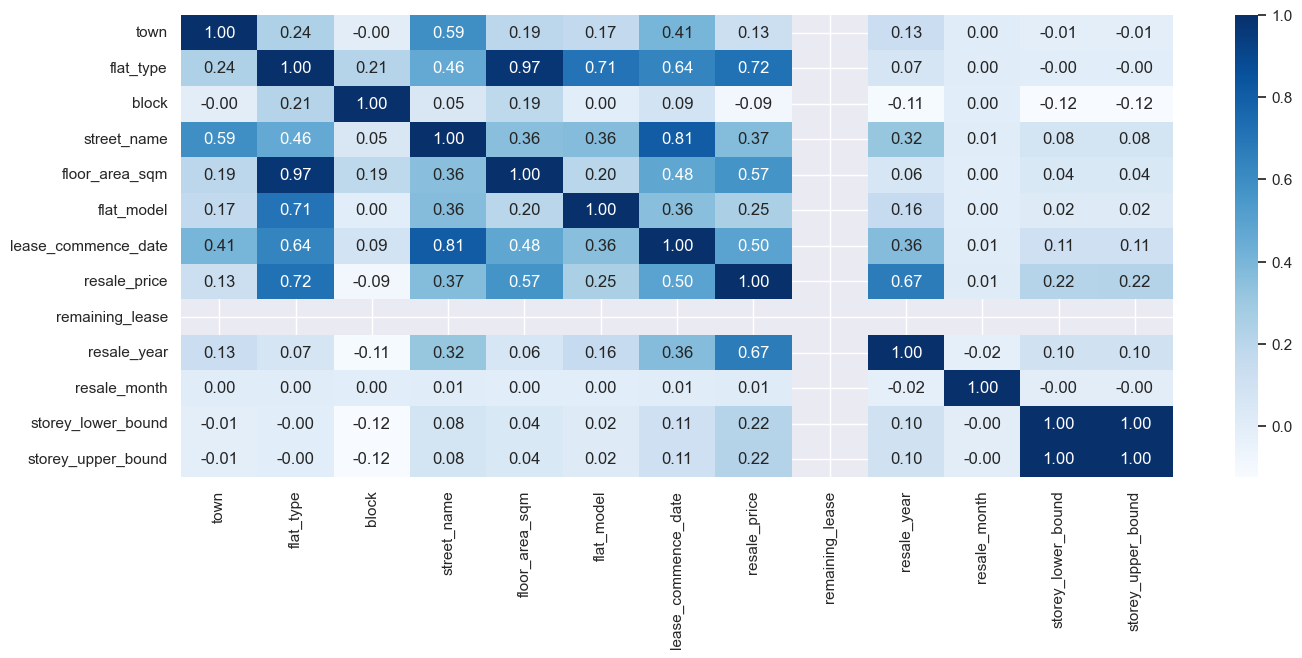

In [85]:
#visualize the correlation matrix in seaborn using a heatmap 
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

###MACHINE LEARNING

In [86]:
#splitting the dataframe 
#assign feature and target variable 
x=df1.drop('resale_price',axis=1)
y=df1['resale_price']
#splitting the data into training and  testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
x_train, x_test,y_train ,y_test=train_test_split(x,y,test_size=0.2,random_state=72)

In [87]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(735981, 12) (183996, 12) (735981,) (183996,)


###scaling

In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled,x_test_scaled

(array([[ 1.63925994, -0.43093923, -1.11011065, ..., -0.74904214,
          0.09553351,  0.09229108],
        [-1.64949524, -0.43093923, -1.11391976, ...,  1.0051087 ,
          0.77045935,  0.76733486],
        [ 1.37615953,         nan,  1.26677296, ..., -1.62611757,
          2.12031101,  2.11742243],
        ...,
        [ 1.37615953,         nan, -0.19211554, ..., -0.1643252 ,
          1.44538518,  1.44237865],
        [ 0.19220766,         nan, -1.07201957, ..., -1.04140062,
          1.44538518,  1.44237865],
        [        nan,         nan,  0.44400556, ...,  0.71275023,
         -0.57939232, -0.58275271]]),
 array([[ 1.37615953,         nan,  0.68778849, ...,  1.58982565,
          0.09553351,  0.09229108],
        [-0.20244296, -0.43093923,  0.64969741, ...,  1.0051087 ,
         -0.57939232, -0.58275271],
        [ 1.63925994,         nan, -1.11011065, ..., -0.45668367,
          0.09553351,  0.09229108],
        ...,
        [-0.33399317, -0.43093923, -0.99202829, ...,  

### fitting the model

In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  #using XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### K Nearest Neighbor Regression 


In [90]:
#x train_scaled and y train_scaled has null values so replacing them with x_train_imputed,x_test_imputed

from sklearn.impute import SimpleImputer

# Instantiate the imputer with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on training data
x_train_imputed = imputer.fit_transform(x_train_scaled)

# Transform the test data using the trained imputer
x_test_imputed = imputer.transform(x_test_scaled)


In [91]:
#create and train the K Nearest Neighbor Regression model 
knn_regressor=KNeighborsRegressor(n_neighbors=5) #may need to adjust number of neighbours 
knn_regressor.fit(x_train_imputed,y_train)

#make predictions on the test set using KNN model 
y_pred_knn=knn_regressor.predict(x_test_imputed)

#calculate Mean Absolute error (MAE)
mae_knn=mean_absolute_error(y_test,y_pred_knn)

#calculate Mean Squared error (MSE)
mse_knn=mean_squared_error(y_test,y_pred_knn)

#calculate the root mean squared error
rmse_knn=np.sqrt(mse_knn)

#calculate R-squared (r2 ) score:
r2_knn=r2_score(y_test,y_pred_knn)

print("Mean Absolute Error(MAE)    :",mae_knn)
print("Mean Squared Error (MSE)    :",mse_knn)
print("Root Mean square Error(RMSE):",rmse_knn)
print("R-squared(r2)score          :",r2_knn)
       

Mean Absolute Error(MAE)    : 30660.771220841758
Mean Squared Error (MSE)    : 2127268288.2845418
Root Mean square Error(RMSE): 46122.31876526311
R-squared(r2)score          : 0.9259233869115091


###DECISION TREE REGRESSSION


In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [93]:
#CREATE AND TRAIN THE DECISION TREE REGRESSOR MODEL 
dt_regressor=DecisionTreeRegressor(max_depth=20,random_state=11)
dt_regressor.fit(x_train,y_train)

#make prediction on the test set using decision tree model 
y_pred_dt=dt_regressor.predict(x_test) 

#calculating the mean absolute error (MAE)
mae_dt=mean_absolute_error(y_test,y_pred_dt)

#calculating the mean squared error 
mse_dt=mean_squared_error(y_test,y_pred_dt)

#calculating Root mean squared error 
r2_dt=r2_score(y_test,y_pred_dt)

print("Mean Absolute Error (MAE)   :",mae_dt)
print("Mean Squared Error (MSE))  :" ,mse_dt)
print("Root Mean Squared Error (RMSE):" ,r2_dt)

Mean Absolute Error (MAE)   : 18621.84069090071
Mean Squared Error (MSE))  : 802823915.5926005
Root Mean Squared Error (RMSE): 0.972043734727274


###RANDOM FOREST REGRESSION


In [94]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

#create and train the random forest regressor model 
rf_regressor=RandomForestRegressor(random_state=42)
rf_regressor.fit(x_train,y_train)

# make prediction using the test set 
y_pred=rf_regressor.predict(x_test)

#calculate mean absolute error (MAE)
mae=mean_absolute_error(y_test,y_pred)

#calculate the mean squared error (MSE)
mse=mean_squared_error(y_test,y_pred)

#calculating the root mean squared error
rmse=np.sqrt(mse)

#calculate the R-squared (R2) score
rf_r2=r2_score(y_test,y_pred)

print("Mean Absolute Error(MAE)  :",mae)
print("Mean Squared Error(MSE)    :",mse)
print("Root Mean Square Error (RMSE):",rmse)
print("R-squared (R2)score          :",rf_r2 )


#### XG BOOST REGRESSION 

In [ ]:
#create and train an XGBOOST REGRESSOR 
xgregressor= XGBRegressor()
xgregressor.fit(x_train,y_train)

#make predictions
y_pred=xgregressor.predict(x_test)

#calculating mean absolute error (MAE)
mae=mean_absolute_error(y_test,y_pred)

#calculating mean squared error (MSE)
mse=mean_squared_error(y_test,y_pred)

#calculating the root mean squared error (RMSE)
rmse=np.sqrt(mse)

#calcualte R-squared (r2) score
xgb_r2=r2_score(y_test,y_pred)

print("Mean Absolute Error (MAE)   :",mae)
print("Mean squared Error(MSE)  :",mse)
print("Root Mean Squared Error (RMSE)     :",rmse)
print("R-squared (R2) Score      :",xgb_r2)



###FINALIZING THE MODELS

In [ ]:
models=['KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','XGBRegressor']
score=[r2_knn,r2_dt,rf_r2,xgb_r2]

fig=px.bar(x=models, y=score , title='R_2 Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score=max(score)  #Intialise max_score with the maximum value in the score list \
max_model=""

for model , score_value in zip(models,score):
    print(model,score_value)
    if score_value ==max_score:
        max_model=model

print(f"\nModel: {max_model} contain Maximum R2_Score:{max_score}")


#suggestion

In [ ]:
rf_regressor.feature_importances_


In [ ]:
sorted_idx=rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx],rf_regressor.feature_imortances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()

###saving the model

In [ ]:
model=rf_regressor.fit(x_train,y_train)


In [ ]:
model

In [ ]:
import pickle

#save the model to disk 
filename='RandomForestRegressor_model.pkl'
with open(filename,'wb')as file:
    pickle.dump(model,file)

print(f"saved{filename} model to disk")


###predicting 

In [ ]:
#get sample to predict the resale price 
pre_df=df1.sample(n=5)
pre_df

In [ ]:
#drop the resale price column
A=pre_df.drop('resale_price',axis=1)

###RESALE PRICE

In [ ]:
#make predictions on the sample
pre_pred=rf_regressor.predict(A)
pre_pred